In [ ]:
!pip install pandas
!pip install xlrd
!pip install matplotlib
!pip install scipy
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df_userinfo = pd.read_csv("/content/drive/MyDrive/Final Morden DataMining/user_info.csv")
df_usermatch = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset Segmentation/Dataset/user_match.csv")


Mounted at /content/drive


# **DATASET**

# **Userinfo**

In [ ]:

df_userinfo.head()

,date,account_id,online_time,level,online_frequency,paid_amount,paid_frequency
0,8/1/22,xxxxxxxxxxxxxxxx7c85c1,5.825850,3,1,0,0
1,8/1/22,xxxxxxxxxxxxxxxx7c52a6,335.822133,10,8,0,0
2,8/1/22,xxxxxxxxxxxxxxxx7b5d00,10.570050,5,1,0,0
3,8/1/22,xxxxxxxxxxxxxxxxf2fb80,1.263983,12,1,0,0
4,8/1/22,xxxxxxxxxxxxxxxx7c1302,97.377450,7,8,0,0


In [ ]:
df_userinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046848 entries, 0 to 1046847
Data columns (total 7 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   date              1046848 non-null  object 
 1   account_id        1046848 non-null  object 
 2   online_time       1046848 non-null  float64
 3   level             1046848 non-null  int64  
 4   online_frequency  1046848 non-null  int64  
 5   paid_amount       1046848 non-null  int64  
 6   paid_frequency    1046848 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 55.9+ MB


In [ ]:
#userinfo = df_userinfo.groupby(['date', 'account_id'])
#userinfo.first()
from datetime import datetime
df_userinfo['date'] = pd.to_datetime(df_userinfo['date'], format = '%m/%d/%y')
df_userinfo['date'] =pd.to_datetime(df_userinfo['date'].dt.strftime('%Y-%m-%d'))
df_userinfo

,date,account_id,online_time,level,online_frequency,paid_amount,paid_frequency
0,2022-08-01,xxxxxxxxxxxxxxxx7c85c1,5.825850,3,1,0,0
1,2022-08-01,xxxxxxxxxxxxxxxx7c52a6,335.822133,10,8,0,0
2,2022-08-01,xxxxxxxxxxxxxxxx7b5d00,10.570050,5,1,0,0
3,2022-08-01,xxxxxxxxxxxxxxxxf2fb80,1.263983,12,1,0,0
4,2022-08-01,xxxxxxxxxxxxxxxx7c1302,97.377450,7,8,0,0
...,...,...,...,...,...,...,...
1046843,2022-08-31,xxxxxxxxxxxxxxxxa7a6ed,71.158350,19,5,0,0
1046844,2022-08-31,xxxxxxxxxxxxxxxx7aa32a,242.053083,25,6,0,0
1046845,2022-08-31,xxxxxxxxxxxxxxxxd173a8,13.486067,10,1,0,0
1046846,2022-08-31,xxxxxxxxxxxxxxxxa89ec5,24.353833,1,2,0,0


In [ ]:
userinfo=df_userinfo.groupby(['date','account_id'])[['online_time', 'level', 'online_frequency', 'paid_amount', 'paid_frequency']].sum()

userif=userinfo.reset_index()
userif

,date,account_id,online_time,level,online_frequency,paid_amount,paid_frequency
0,2022-08-01,xxxxxxxxxxxxxxxx0e3536,182.956617,21,4,0,0
1,2022-08-01,xxxxxxxxxxxxxxxx0e3540,111.077267,10,1,0,0
2,2022-08-01,xxxxxxxxxxxxxxxx0e3542,17.447350,12,2,0,0
3,2022-08-01,xxxxxxxxxxxxxxxx0e3543,120.428117,12,5,0,0
4,2022-08-01,xxxxxxxxxxxxxxxx0e356c,3.452717,14,1,0,0
...,...,...,...,...,...,...,...
1046843,2022-08-31,xxxxxxxxxxxxxxxxf355cd,91.486317,22,1,0,0
1046844,2022-08-31,xxxxxxxxxxxxxxxxf355f1,35.488450,10,1,0,0
1046845,2022-08-31,xxxxxxxxxxxxxxxxf3571d,1.990333,27,1,0,0
1046846,2022-08-31,xxxxxxxxxxxxxxxxf35774,43.063850,22,2,0,0


In [ ]:
userif.to_csv('UserinfoUserinfo.csv')

In [ ]:
userif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046848 entries, 0 to 1046847
Data columns (total 7 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   date              1046848 non-null  datetime64[ns]
 1   account_id        1046848 non-null  object        
 2   online_time       1046848 non-null  float64       
 3   level             1046848 non-null  int64         
 4   online_frequency  1046848 non-null  int64         
 5   paid_amount       1046848 non-null  int64         
 6   paid_frequency    1046848 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 55.9+ MB


# **Usermatch**

In [ ]:
#groupby date and accountid, dummy modegame and status then count(modegame, status) and count(time)
df_usermatch.head(5)

,date,account_id,mode_game,status,time
0,2022-08-19,xxxxxxxxxxxxxxxx2d84d7,dau_xep_hang,tim_va_vao_tran_thanh_cong,11
1,2022-08-19,xxxxxxxxxxxxxxxx2d84d7,dau_xep_hang,tim_va_vao_tran_thanh_cong,53
2,2022-08-19,xxxxxxxxxxxxxxxx2d84d7,dau_xep_hang,tim_va_vao_tran_thanh_cong,19
3,2022-08-19,xxxxxxxxxxxxxxxx2d84d7,dau_xep_hang,tim_va_vao_tran_thanh_cong,70
4,2022-08-19,xxxxxxxxxxxxxxxx2d84d7,dau_thuong,khong_tim_duoc_tran,52


In [ ]:
df_usermatch['date'] = pd.to_datetime(df_usermatch['date'], format = '%Y/%m/%d')
df_usermatch['date'] =pd.to_datetime(df_usermatch['date'].dt.strftime('%Y-%m-%d'))
df_usermatch

,date,account_id,mode_game,status,time
0,2022-08-19,xxxxxxxxxxxxxxxx2d84d7,dau_xep_hang,tim_va_vao_tran_thanh_cong,11
1,2022-08-19,xxxxxxxxxxxxxxxx2d84d7,dau_xep_hang,tim_va_vao_tran_thanh_cong,53
2,2022-08-19,xxxxxxxxxxxxxxxx2d84d7,dau_xep_hang,tim_va_vao_tran_thanh_cong,19
3,2022-08-19,xxxxxxxxxxxxxxxx2d84d7,dau_xep_hang,tim_va_vao_tran_thanh_cong,70
4,2022-08-19,xxxxxxxxxxxxxxxx2d84d7,dau_thuong,khong_tim_duoc_tran,52
...,...,...,...,...,...
3781924,2022-08-19,xxxxxxxxxxxxxxxxa51ee2,dau_thuong,tim_va_vao_tran_thanh_cong,4
3781925,2022-08-19,xxxxxxxxxxxxxxxxa51ee4,dau_thuong,tim_va_vao_tran_thanh_cong,2
3781926,2022-08-19,xxxxxxxxxxxxxxxxa51ef3,dau_thuong,tim_va_vao_tran_thanh_cong,3
3781927,2022-08-19,xxxxxxxxxxxxxxxxa51ef6,dau_thuong,tim_va_vao_tran_thanh_cong,2


In [ ]:
df_usermatch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3781929 entries, 0 to 3781928
Data columns (total 5 columns):
 #   Column      Dtype         
---  ------      -----         
 0   date        datetime64[ns]
 1   account_id  object        
 2   mode_game   object        
 3   status      object        
 4   time        int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 144.3+ MB


In [ ]:
usermatch = pd.get_dummies(df_usermatch, columns=['mode_game', 'status'])
usermatch

,date,account_id,time,mode_game_cac_che_do_choi_khac,mode_game_dau_thuong,mode_game_dau_xep_hang,status_khong_tim_duoc_tran,status_tim_va_vao_tran_thanh_cong
0,2022-08-19,xxxxxxxxxxxxxxxx2d84d7,11,0,0,1,0,1
1,2022-08-19,xxxxxxxxxxxxxxxx2d84d7,53,0,0,1,0,1
2,2022-08-19,xxxxxxxxxxxxxxxx2d84d7,19,0,0,1,0,1
3,2022-08-19,xxxxxxxxxxxxxxxx2d84d7,70,0,0,1,0,1
4,2022-08-19,xxxxxxxxxxxxxxxx2d84d7,52,0,1,0,1,0
...,...,...,...,...,...,...,...,...
3781924,2022-08-19,xxxxxxxxxxxxxxxxa51ee2,4,0,1,0,0,1
3781925,2022-08-19,xxxxxxxxxxxxxxxxa51ee4,2,0,1,0,0,1
3781926,2022-08-19,xxxxxxxxxxxxxxxxa51ef3,3,0,1,0,0,1
3781927,2022-08-19,xxxxxxxxxxxxxxxxa51ef6,2,0,1,0,0,1


In [ ]:
usermt=usermatch.groupby(['date','account_id'])[['time',	'mode_game_cac_che_do_choi_khac',	'mode_game_dau_thuong',
                                          'mode_game_dau_xep_hang',	'status_khong_tim_duoc_tran',
                                          'status_tim_va_vao_tran_thanh_cong']].sum()
usermat=usermt.reset_index()
usermat

,date,account_id,time,mode_game_cac_che_do_choi_khac,mode_game_dau_thuong,mode_game_dau_xep_hang,status_khong_tim_duoc_tran,status_tim_va_vao_tran_thanh_cong
0,2022-08-01,xxxxxxxxxxxxxxxx0e3536,308,6,0,8,5,9
1,2022-08-01,xxxxxxxxxxxxxxxx0e3540,65,0,0,6,1,5
2,2022-08-01,xxxxxxxxxxxxxxxx0e3542,3,0,0,1,0,1
3,2022-08-01,xxxxxxxxxxxxxxxx0e3543,145,1,0,9,5,5
4,2022-08-01,xxxxxxxxxxxxxxxx0e358b,1,0,0,2,0,2
...,...,...,...,...,...,...,...,...
847674,2022-08-31,xxxxxxxxxxxxxxxxf3553c,478,12,0,0,2,10
847675,2022-08-31,xxxxxxxxxxxxxxxxf35544,10,0,0,1,0,1
847676,2022-08-31,xxxxxxxxxxxxxxxxf355cd,124,0,0,5,1,4
847677,2022-08-31,xxxxxxxxxxxxxxxxf355f1,58,3,0,0,0,3


In [ ]:
usermat.to_csv('Usermatch.csv')

In [ ]:
usermat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847679 entries, 0 to 847678
Data columns (total 8 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   date                               847679 non-null  datetime64[ns]
 1   account_id                         847679 non-null  object        
 2   time                               847679 non-null  int64         
 3   mode_game_cac_che_do_choi_khac     847679 non-null  float64       
 4   mode_game_dau_thuong               847679 non-null  float64       
 5   mode_game_dau_xep_hang             847679 non-null  float64       
 6   status_khong_tim_duoc_tran         847679 non-null  float64       
 7   status_tim_va_vao_tran_thanh_cong  847679 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 51.7+ MB


# **Usergame**

In [ ]:
import glob
file_usergame = glob.glob("/content/drive/MyDrive/Colab Notebooks/Dataset Segmentation/Dataset/user_game/*.csv")


In [ ]:
merge_usergame = pd.concat(map(pd.read_csv, file_usergame), ignore_index=True)

In [ ]:
#remove roomid_no important
#groupby accountid and ordertime
#dummy modegame
#count(bttime, win, robotnum, AFK)
merge_usergame.head(5)

,account_id,room_id,order_time,bt_time,mode_game,robot_num,win,AFK
0,xxxxxxxxxxxxxxxxf124ac,matchRoom_xxxxxx_xxxxxx-xxxxx-xxxx-xxxx-5d7a91...,2022-08-06T00:04:01.000Z,30,dau_thuong_5v5,0,1,0
1,xxxxxxxxxxxxxxxxbd3093,matchRoom_xxxxxx_xxxxxx-xxxxx-xxxx-xxxx-5d7a91...,2022-08-06T00:04:01.000Z,30,dau_thuong_5v5,0,0,0
2,xxxxxxxxxxxxxxxxf25a6f,matchRoom_xxxxxx_xxxxxx-xxxxx-xxxx-xxxx-5d7a91...,2022-08-06T00:04:02.000Z,16,dau_thuong_5v5,0,1,0
3,xxxxxxxxxxxxxxxx2ceec1,matchRoom_xxxxxx_xxxxxx-xxxxx-xxxx-xxxx-5d7a91...,2022-08-06T00:04:04.000Z,9,dau_thuong_5v5,9,1,0
4,xxxxxxxxxxxxxxxxbd4a07,matchRoom_xxxxxx_xxxxxx-xxxxx-xxxx-xxxx-85248e...,2022-08-06T00:04:05.000Z,5,cac_che_do_choi_khac,0,1,0


In [ ]:
n=merge_usergame.rename(columns={"order_time": "date"})
n

,account_id,room_id,date,bt_time,mode_game,robot_num,win,AFK
0,xxxxxxxxxxxxxxxxf124ac,matchRoom_xxxxxx_xxxxxx-xxxxx-xxxx-xxxx-5d7a91...,2022-08-06T00:04:01.000Z,30,dau_thuong_5v5,0,1,0
1,xxxxxxxxxxxxxxxxbd3093,matchRoom_xxxxxx_xxxxxx-xxxxx-xxxx-xxxx-5d7a91...,2022-08-06T00:04:01.000Z,30,dau_thuong_5v5,0,0,0
2,xxxxxxxxxxxxxxxxf25a6f,matchRoom_xxxxxx_xxxxxx-xxxxx-xxxx-xxxx-5d7a91...,2022-08-06T00:04:02.000Z,16,dau_thuong_5v5,0,1,0
3,xxxxxxxxxxxxxxxx2ceec1,matchRoom_xxxxxx_xxxxxx-xxxxx-xxxx-xxxx-5d7a91...,2022-08-06T00:04:04.000Z,9,dau_thuong_5v5,9,1,0
4,xxxxxxxxxxxxxxxxbd4a07,matchRoom_xxxxxx_xxxxxx-xxxxx-xxxx-xxxx-85248e...,2022-08-06T00:04:05.000Z,5,cac_che_do_choi_khac,0,1,0
...,...,...,...,...,...,...,...,...
3828335,xxxxxxxxxxxxxxxxa89c80,matchRoom_xxxxxx_xxxxxx-xxxxx-xxxx-xxxx-5132aa...,2022-08-30T23:59:54.000Z,9,dau_thuong_5v5,0,1,0
3828336,xxxxxxxxxxxxxxxxf2287d,matchRoom_xxxxxx_xxxxxx-xxxxx-xxxx-xxxx-5132aa...,2022-08-30T23:59:56.000Z,9,dau_thuong_5v5,0,1,0
3828337,xxxxxxxxxxxxxxxx2e7656,matchRoom_xxxxxx_xxxxxx-xxxxx-xxxx-xxxx-5132aa...,2022-08-30T23:59:56.000Z,13,dau_thuong_5v5,9,1,0
3828338,xxxxxxxxxxxxxxxxa89c33,matchRoom_xxxxxx_xxxxxx-xxxxx-xxxx-xxxx-5132aa...,2022-08-30T23:59:57.000Z,9,dau_thuong_5v5,0,1,0


In [ ]:
n.to_csv("UserGame.csv", index=False)

In [ ]:
usergame1=n.drop(columns=['room_id'])
usergame1

,account_id,date,bt_time,mode_game,robot_num,win,AFK
0,xxxxxxxxxxxxxxxxf124ac,2022-08-06T00:04:01.000Z,30,dau_thuong_5v5,0,1,0
1,xxxxxxxxxxxxxxxxbd3093,2022-08-06T00:04:01.000Z,30,dau_thuong_5v5,0,0,0
2,xxxxxxxxxxxxxxxxf25a6f,2022-08-06T00:04:02.000Z,16,dau_thuong_5v5,0,1,0
3,xxxxxxxxxxxxxxxx2ceec1,2022-08-06T00:04:04.000Z,9,dau_thuong_5v5,9,1,0
4,xxxxxxxxxxxxxxxxbd4a07,2022-08-06T00:04:05.000Z,5,cac_che_do_choi_khac,0,1,0
...,...,...,...,...,...,...,...
3828335,xxxxxxxxxxxxxxxxa89c80,2022-08-30T23:59:54.000Z,9,dau_thuong_5v5,0,1,0
3828336,xxxxxxxxxxxxxxxxf2287d,2022-08-30T23:59:56.000Z,9,dau_thuong_5v5,0,1,0
3828337,xxxxxxxxxxxxxxxx2e7656,2022-08-30T23:59:56.000Z,13,dau_thuong_5v5,9,1,0
3828338,xxxxxxxxxxxxxxxxa89c33,2022-08-30T23:59:57.000Z,9,dau_thuong_5v5,0,1,0


In [ ]:
usergame = pd.get_dummies(usergame1, columns=['mode_game'])
usergame

,account_id,date,bt_time,robot_num,win,AFK,mode_game_cac_che_do_choi_khac,mode_game_dau_giai_tri,mode_game_dau_thuong_5v5,mode_game_dau_xep_hang
0,xxxxxxxxxxxxxxxxf124ac,2022-08-06T00:04:01.000Z,30,0,1,0,0,0,1,0
1,xxxxxxxxxxxxxxxxbd3093,2022-08-06T00:04:01.000Z,30,0,0,0,0,0,1,0
2,xxxxxxxxxxxxxxxxf25a6f,2022-08-06T00:04:02.000Z,16,0,1,0,0,0,1,0
3,xxxxxxxxxxxxxxxx2ceec1,2022-08-06T00:04:04.000Z,9,9,1,0,0,0,1,0
4,xxxxxxxxxxxxxxxxbd4a07,2022-08-06T00:04:05.000Z,5,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3828335,xxxxxxxxxxxxxxxxa89c80,2022-08-30T23:59:54.000Z,9,0,1,0,0,0,1,0
3828336,xxxxxxxxxxxxxxxxf2287d,2022-08-30T23:59:56.000Z,9,0,1,0,0,0,1,0
3828337,xxxxxxxxxxxxxxxx2e7656,2022-08-30T23:59:56.000Z,13,9,1,0,0,0,1,0
3828338,xxxxxxxxxxxxxxxxa89c33,2022-08-30T23:59:57.000Z,9,0,1,0,0,0,1,0


In [ ]:
import pytz
usergame['date'] = pd.to_datetime(usergame['date'], format = '%Y-%m-%dT%H:%M:%S')
usergame['date'] = pd.to_datetime(usergame['date']).dt.tz_localize(None)
usergame['date'] =pd.to_datetime(usergame['date'].dt.strftime('%Y-%m-%d'))
usergame

,account_id,date,bt_time,robot_num,win,AFK,mode_game_cac_che_do_choi_khac,mode_game_dau_giai_tri,mode_game_dau_thuong_5v5,mode_game_dau_xep_hang
0,xxxxxxxxxxxxxxxxf124ac,2022-08-06,30,0,1,0,0,0,1,0
1,xxxxxxxxxxxxxxxxbd3093,2022-08-06,30,0,0,0,0,0,1,0
2,xxxxxxxxxxxxxxxxf25a6f,2022-08-06,16,0,1,0,0,0,1,0
3,xxxxxxxxxxxxxxxx2ceec1,2022-08-06,9,9,1,0,0,0,1,0
4,xxxxxxxxxxxxxxxxbd4a07,2022-08-06,5,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3828335,xxxxxxxxxxxxxxxxa89c80,2022-08-30,9,0,1,0,0,0,1,0
3828336,xxxxxxxxxxxxxxxxf2287d,2022-08-30,9,0,1,0,0,0,1,0
3828337,xxxxxxxxxxxxxxxx2e7656,2022-08-30,13,9,1,0,0,0,1,0
3828338,xxxxxxxxxxxxxxxxa89c33,2022-08-30,9,0,1,0,0,0,1,0


In [ ]:
usergame.dtypes

account_id                                object
date                              datetime64[ns]
bt_time                                    int64
robot_num                                  int64
win                                        int64
AFK                                        int64
mode_game_cac_che_do_choi_khac             uint8
mode_game_dau_giai_tri                     uint8
mode_game_dau_thuong_5v5                   uint8
mode_game_dau_xep_hang                     uint8
dtype: object

In [ ]:
usergm=usergame.groupby(['account_id', 'date'])[['bt_time',	'robot_num',	'win',	'AFK',
                                                'mode_game_cac_che_do_choi_khac',
                                                'mode_game_dau_giai_tri',
                                                'mode_game_dau_thuong_5v5',	'mode_game_dau_xep_hang']].sum()
userg=usergm.reset_index()
userg

,account_id,date,bt_time,robot_num,win,AFK,mode_game_cac_che_do_choi_khac,mode_game_dau_giai_tri,mode_game_dau_thuong_5v5,mode_game_dau_xep_hang
0,xxxxxxxxxxxxxxxx0e352a,2022-08-09,11,9,1,0,0,0,1,0
1,xxxxxxxxxxxxxxxx0e3536,2022-08-01,133,0,1,0,0,0,7,0
2,xxxxxxxxxxxxxxxx0e3536,2022-08-02,81,0,3,0,0,0,5,0
3,xxxxxxxxxxxxxxxx0e3536,2022-08-03,118,5,4,0,0,1,5,1
4,xxxxxxxxxxxxxxxx0e3536,2022-08-05,130,7,3,0,0,1,6,0
...,...,...,...,...,...,...,...,...,...,...
878526,xxxxxxxxxxxxxxxxf357d0,2022-08-03,58,10,4,0,0,0,4,0
878527,xxxxxxxxxxxxxxxxf357d0,2022-08-04,68,0,3,0,0,0,4,0
878528,xxxxxxxxxxxxxxxxf357d0,2022-08-07,87,0,2,0,0,0,5,0
878529,xxxxxxxxxxxxxxxxf357d0,2022-08-11,68,0,2,0,0,0,5,0


In [ ]:
userg.to_csv('Usergame.csv')

In [ ]:
usergm.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 878531 entries, ('xxxxxxxxxxxxxxxx0e352a', Timestamp('2022-08-09 00:00:00')) to ('xxxxxxxxxxxxxxxxf357d5', Timestamp('2022-08-04 00:00:00'))
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   bt_time                         878531 non-null  int64
 1   robot_num                       878531 non-null  int64
 2   win                             878531 non-null  int64
 3   AFK                             878531 non-null  int64
 4   mode_game_cac_che_do_choi_khac  878531 non-null  uint8
 5   mode_game_dau_giai_tri          878531 non-null  uint8
 6   mode_game_dau_thuong_5v5        878531 non-null  uint8
 7   mode_game_dau_xep_hang          878531 non-null  uint8
dtypes: int64(4), uint8(4)
memory usage: 37.8+ MB


# **Merge data(include userinfor, usergame, usermatch)**

---



In [ ]:
info_match= userinfo.merge(usermt, on=["date","account_id"])
im=info_match.reset_index()
im

,date,account_id,online_time,level,online_frequency,paid_amount,paid_frequency,time,mode_game_cac_che_do_choi_khac,mode_game_dau_thuong,mode_game_dau_xep_hang,status_khong_tim_duoc_tran,status_tim_va_vao_tran_thanh_cong
0,2022-08-01,xxxxxxxxxxxxxxxx0e3536,182.956617,21,4,0,0,308,6,0,8,5,9
1,2022-08-01,xxxxxxxxxxxxxxxx0e3540,111.077267,10,1,0,0,65,0,0,6,1,5
2,2022-08-01,xxxxxxxxxxxxxxxx0e3542,17.447350,12,2,0,0,3,0,0,1,0,1
3,2022-08-01,xxxxxxxxxxxxxxxx0e3543,120.428117,12,5,0,0,145,1,0,9,5,5
4,2022-08-01,xxxxxxxxxxxxxxxx0e358b,29.301917,9,1,0,0,1,0,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
839912,2022-08-31,xxxxxxxxxxxxxxxxf3553c,232.600483,21,3,0,0,478,12,0,0,2,10
839913,2022-08-31,xxxxxxxxxxxxxxxxf35544,20.488967,9,1,0,0,10,0,0,1,0,1
839914,2022-08-31,xxxxxxxxxxxxxxxxf355cd,91.486317,22,1,0,0,124,0,0,5,1,4
839915,2022-08-31,xxxxxxxxxxxxxxxxf355f1,35.488450,10,1,0,0,58,3,0,0,0,3


In [ ]:
im.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839917 entries, 0 to 839916
Data columns (total 13 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   date                               839917 non-null  datetime64[ns]
 1   account_id                         839917 non-null  object        
 2   online_time                        839917 non-null  float64       
 3   level                              839917 non-null  int64         
 4   online_frequency                   839917 non-null  int64         
 5   paid_amount                        839917 non-null  int64         
 6   paid_frequency                     839917 non-null  int64         
 7   time                               839917 non-null  int64         
 8   mode_game_cac_che_do_choi_khac     839917 non-null  float64       
 9   mode_game_dau_thuong               839917 non-null  float64       
 10  mode_game_dau_xep_ha

In [ ]:
user_df=im.merge(usergm, on=["date","account_id"])
user_df

,date,account_id,online_time,level,online_frequency,paid_amount,paid_frequency,time,mode_game_cac_che_do_choi_khac_x,mode_game_dau_thuong,...,status_khong_tim_duoc_tran,status_tim_va_vao_tran_thanh_cong,bt_time,robot_num,win,AFK,mode_game_cac_che_do_choi_khac_y,mode_game_dau_giai_tri,mode_game_dau_thuong_5v5,mode_game_dau_xep_hang_y
0,2022-08-01,xxxxxxxxxxxxxxxx0e3536,182.956617,21,4,0,0,308,6,0,...,5,9,133,0,1,0,0,0,7,0
1,2022-08-01,xxxxxxxxxxxxxxxx0e3540,111.077267,10,1,0,0,65,0,0,...,1,5,82,10,3,0,0,0,5,0
2,2022-08-01,xxxxxxxxxxxxxxxx0e3542,17.447350,12,2,0,0,3,0,0,...,0,1,11,5,1,0,0,0,1,0
3,2022-08-01,xxxxxxxxxxxxxxxx0e3543,120.428117,12,5,0,0,145,1,0,...,5,5,68,0,6,0,4,0,3,0
4,2022-08-01,xxxxxxxxxxxxxxxx0e358b,29.301917,9,1,0,0,1,0,0,...,0,2,22,14,2,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799581,2022-08-31,xxxxxxxxxxxxxxxxf3553c,232.600483,21,3,0,0,478,12,0,...,2,10,203,6,1,0,0,7,0,0
799582,2022-08-31,xxxxxxxxxxxxxxxxf35544,20.488967,9,1,0,0,10,0,0,...,0,1,13,0,1,0,0,0,1,0
799583,2022-08-31,xxxxxxxxxxxxxxxxf355cd,91.486317,22,1,0,0,124,0,0,...,1,4,71,0,2,0,0,0,4,0
799584,2022-08-31,xxxxxxxxxxxxxxxxf355f1,35.488450,10,1,0,0,58,3,0,...,0,3,28,12,0,0,0,2,0,0


In [ ]:
user_df['modegame_cac_che_do_choi_khac'] = user_df['mode_game_cac_che_do_choi_khac_x'] + user_df['mode_game_cac_che_do_choi_khac_y']
user_df['modegame_cac_che_do_choi_khac']


0          6
1          0
2          0
3          5
4          0
          ..
799581    12
799582     0
799583     0
799584     3
799585     0
Name: modegame_cac_che_do_choi_khac, Length: 799586, dtype: uint64

In [ ]:
user_df['modegame_che_do_choi_giaitri_khac'] = user_df['mode_game_dau_giai_tri'] + user_df['modegame_cac_che_do_choi_khac']
user_df['modegame_che_do_choi_giaitri_khac']

0          6
1          0
2          0
3          5
4          0
          ..
799581    19
799582     0
799583     0
799584     5
799585     0
Name: modegame_che_do_choi_giaitri_khac, Length: 799586, dtype: uint64

In [ ]:
user_df['modegame_dau_xep_hang'] = user_df['mode_game_dau_xep_hang_x'] +user_df['mode_game_dau_xep_hang_y']
user_df['modegame_dau_xep_hang']

0         8
1         6
2         1
3         9
4         2
         ..
799581    0
799582    1
799583    5
799584    0
799585    2
Name: modegame_dau_xep_hang, Length: 799586, dtype: uint64

In [ ]:
user_df['modegame_dau_thuong'] = user_df['mode_game_dau_thuong'] + user_df['mode_game_dau_thuong_5v5']
user_df['modegame_dau_thuong']

0         7
1         5
2         1
3         3
4         2
         ..
799581    0
799582    1
799583    4
799584    0
799585    2
Name: modegame_dau_thuong, Length: 799586, dtype: uint64

In [ ]:
user=user_df.drop(['mode_game_cac_che_do_choi_khac_x', 'mode_game_dau_xep_hang_x', 'mode_game_dau_thuong', 'mode_game_dau_giai_tri',
           'mode_game_cac_che_do_choi_khac_y', 'mode_game_dau_xep_hang_y', 'mode_game_dau_thuong_5v5', 'modegame_cac_che_do_choi_khac'], axis=1)
user

,date,account_id,online_time,level,online_frequency,paid_amount,paid_frequency,time,status_khong_tim_duoc_tran,status_tim_va_vao_tran_thanh_cong,bt_time,robot_num,win,AFK,modegame_che_do_choi_giaitri_khac,modegame_dau_xep_hang,modegame_dau_thuong
0,2022-08-01,xxxxxxxxxxxxxxxx0e3536,182.956617,21,4,0,0,308,5,9,133,0,1,0,6,8,7
1,2022-08-01,xxxxxxxxxxxxxxxx0e3540,111.077267,10,1,0,0,65,1,5,82,10,3,0,0,6,5
2,2022-08-01,xxxxxxxxxxxxxxxx0e3542,17.447350,12,2,0,0,3,0,1,11,5,1,0,0,1,1
3,2022-08-01,xxxxxxxxxxxxxxxx0e3543,120.428117,12,5,0,0,145,5,5,68,0,6,0,5,9,3
4,2022-08-01,xxxxxxxxxxxxxxxx0e358b,29.301917,9,1,0,0,1,0,2,22,14,2,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799581,2022-08-31,xxxxxxxxxxxxxxxxf3553c,232.600483,21,3,0,0,478,2,10,203,6,1,0,19,0,0
799582,2022-08-31,xxxxxxxxxxxxxxxxf35544,20.488967,9,1,0,0,10,0,1,13,0,1,0,0,1,1
799583,2022-08-31,xxxxxxxxxxxxxxxxf355cd,91.486317,22,1,0,0,124,1,4,71,0,2,0,0,5,4
799584,2022-08-31,xxxxxxxxxxxxxxxxf355f1,35.488450,10,1,0,0,58,0,3,28,12,0,0,5,0,0


In [ ]:
user.to_csv('User.csv')

In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799586 entries, 0 to 799585
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   date                               799586 non-null  datetime64[ns]
 1   account_id                         799586 non-null  object        
 2   online_time                        799586 non-null  float64       
 3   level                              799586 non-null  int64         
 4   online_frequency                   799586 non-null  int64         
 5   paid_amount                        799586 non-null  int64         
 6   paid_frequency                     799586 non-null  int64         
 7   time                               799586 non-null  int64         
 8   status_khong_tim_duoc_tran         799586 non-null  float64       
 9   status_tim_va_vao_tran_thanh_cong  799586 non-null  float64       
 10  bt_time             

# **Descriptive statistic**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
user = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset Segmentation/Userfinal.csv")
user

Mounted at /content/drive


,date,account_id,online_time,level,online_frequency,paid_amount,paid_frequency,time,status_khong_tim_duoc_tran,status_tim_va_vao_tran_thanh_cong,bt_time,robot_num,win,AFK,modegame_che_do_choi_giaitri_khac,modegame_dau_xep_hang,modegame_dau_thuong
0,8/1/2022,xxxxxxxxxxxxxxxx0e3536,182.956617,21,4,0,0,308,5,9,133,0,1,0,6,8,7
1,8/1/2022,xxxxxxxxxxxxxxxx0e3540,111.077267,10,1,0,0,65,1,5,82,10,3,0,0,6,5
2,8/1/2022,xxxxxxxxxxxxxxxx0e3542,17.447350,12,2,0,0,3,0,1,11,5,1,0,0,1,1
3,8/1/2022,xxxxxxxxxxxxxxxx0e3543,120.428117,12,5,0,0,145,5,5,68,0,6,0,5,9,3
4,8/1/2022,xxxxxxxxxxxxxxxx0e358b,29.301917,9,1,0,0,1,0,2,22,14,2,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799581,8/31/2022,xxxxxxxxxxxxxxxxf3553c,232.600483,21,3,0,0,478,2,10,203,6,1,0,19,0,0
799582,8/31/2022,xxxxxxxxxxxxxxxxf35544,20.488967,9,1,0,0,10,0,1,13,0,1,0,0,1,1
799583,8/31/2022,xxxxxxxxxxxxxxxxf355cd,91.486317,22,1,0,0,124,1,4,71,0,2,0,0,5,4
799584,8/31/2022,xxxxxxxxxxxxxxxxf355f1,35.488450,10,1,0,0,58,0,3,28,12,0,0,5,0,0


In [ ]:
user.shape

(799586, 17)

In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799586 entries, 0 to 799585
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   date                               799586 non-null  object 
 1   account_id                         799586 non-null  object 
 2   online_time                        799586 non-null  float64
 3   level                              799586 non-null  int64  
 4   online_frequency                   799586 non-null  int64  
 5   paid_amount                        799586 non-null  int64  
 6   paid_frequency                     799586 non-null  int64  
 7   time                               799586 non-null  int64  
 8   status_khong_tim_duoc_tran         799586 non-null  int64  
 9   status_tim_va_vao_tran_thanh_cong  799586 non-null  int64  
 10  bt_time                            799586 non-null  int64  
 11  robot_num                          7995

In [ ]:
user.describe()

,online_time,level,online_frequency,paid_amount,paid_frequency,time,status_khong_tim_duoc_tran,status_tim_va_vao_tran_thanh_cong,bt_time,robot_num,win,AFK,modegame_che_do_choi_giaitri_khac,modegame_dau_xep_hang,modegame_dau_thuong
count,799586.000000,799586.000000,799586.000000,7.995860e+05,799586.000000,799586.000000,799586.000000,799586.000000,799586.000000,799586.000000,799586.000000,799586.000000,799586.000000,799586.000000,799586.000000
mean,68.475180,8.966300,2.301511,1.554706e+03,0.013648,142.864464,0.810423,3.781363,49.616922,5.967812,3.512225,0.000010,2.199299,3.562075,3.429341
std,87.230666,5.500895,2.090128,9.830576e+04,0.191570,362.664570,2.513347,4.237970,64.064845,15.950537,4.140793,0.003163,5.268613,4.466710,3.974214
min,0.009983,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.161608,5.000000,1.000000,0.000000e+00,0.000000,4.000000,0.000000,1.000000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,37.486633,7.000000,2.000000,0.000000e+00,0.000000,24.000000,0.000000,2.000000,26.000000,0.000000,2.000000,0.000000,2.000000,2.000000,2.000000
75%,78.113871,11.000000,3.000000,0.000000e+00,0.000000,130.000000,1.000000,5.000000,57.000000,7.000000,4.000000,0.000000,2.000000,4.000000,4.000000
max,3320.039600,32.000000,68.000000,4.623300e+07,32.000000,14853.000000,369.000000,87.000000,3443.000000,799.000000,184.000000,1.000000,394.000000,380.000000,174.000000


In [ ]:
user.corr()

,online_time,level,online_frequency,paid_amount,paid_frequency,time,status_khong_tim_duoc_tran,status_tim_va_vao_tran_thanh_cong,bt_time,robot_num,win,AFK,modegame_che_do_choi_giaitri_khac,modegame_dau_xep_hang,modegame_dau_thuong
online_time,1.000000,0.548180,0.676151,0.057733,0.177667,0.756124,0.382527,0.893000,0.918977,0.535470,0.705995,0.003017,0.484580,0.783367,0.759446
level,0.548180,1.000000,0.409158,0.032761,0.124577,0.540132,0.222007,0.450023,0.523498,0.335642,0.276855,0.001313,0.235626,0.406597,0.369392
online_frequency,0.676151,0.409158,1.000000,0.057322,0.192325,0.521660,0.324171,0.651879,0.636056,0.404597,0.536602,0.002760,0.377484,0.569251,0.565644
paid_amount,0.057733,0.032761,0.057322,1.000000,0.341460,0.044812,0.018812,0.036062,0.042181,0.044791,0.110007,-0.000050,0.092143,0.031130,0.026693
paid_frequency,0.177667,0.124577,0.192325,0.341460,1.000000,0.150992,0.067805,0.129323,0.139115,0.102876,0.191914,-0.000225,0.151210,0.121590,0.102249
time,0.756124,0.540132,0.521660,0.044812,0.150992,1.000000,0.465887,0.739484,0.725215,0.529805,0.547999,0.003427,0.419229,0.670104,0.631359
status_khong_tim_duoc_tran,0.382527,0.222007,0.324171,0.018812,0.067805,0.465887,1.000000,0.393698,0.365290,0.217410,0.277967,0.003385,0.310093,0.500766,0.524719
status_tim_va_vao_tran_thanh_cong,0.893000,0.450023,0.651879,0.036062,0.129323,0.739484,0.393698,1.000000,0.911692,0.568808,0.673317,0.002309,0.407923,0.855685,0.854712
bt_time,0.918977,0.523498,0.636056,0.042181,0.139115,0.725215,0.365290,0.911692,1.000000,0.545104,0.687659,0.001994,0.474287,0.782057,0.771306
robot_num,0.535470,0.335642,0.404597,0.044791,0.102876,0.529805,0.217410,0.568808,0.545104,1.000000,0.555589,0.004989,0.610978,0.287931,0.347199


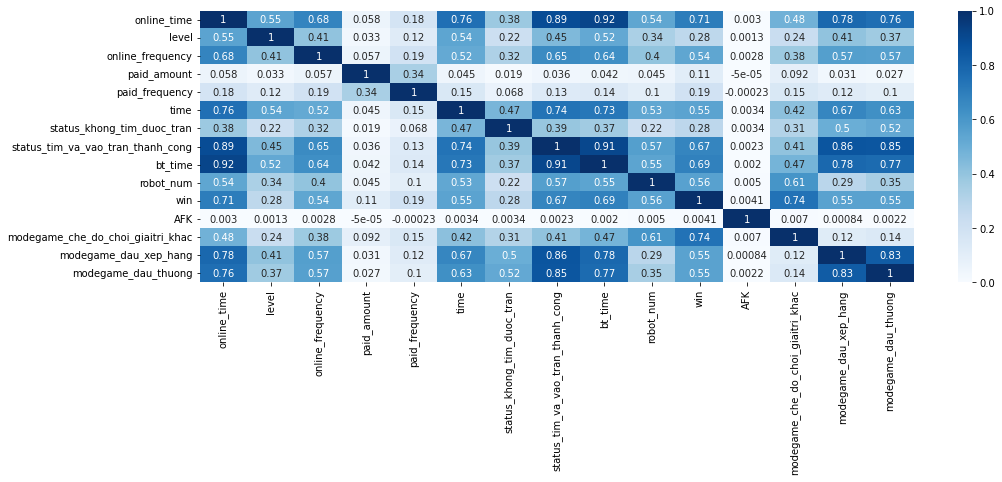

In [ ]:
plt.figure(figsize=(16,5))
sns.heatmap(user.corr(), cmap="Blues", annot=True)
  
# displaying heatmap
plt.show()

# **OUTLIER**

In [ ]:
#OUTLIER
features=['online_time', 'level',	'online_frequency',	'paid_amount','paid_frequency',	'time',	'modegame_che_do_choi_giaitri_khac',	
          'modegame_dau_thuong',	
          'modegame_dau_xep_hang','status_khong_tim_duoc_tran',
          'status_tim_va_vao_tran_thanh_cong',	'bt_time','robot_num',	'win',	'AFK',]
features

In [ ]:
sns.set_style('whitegrid')
for col in features:
  plt.figure(figsize=(16,4))
  plt.subplot(131)
  sns.distplot(user[col],label="skew"+str(np.round(user[col].skew(),2)))
  sns.boxplot(user[col])
  plt.subplot(133)
  plt.subplot(133)
  stats.probplot(user[col],plot=plt)
  plt.tight_layout()
  plt.show

In [ ]:
#chay 95% dataset=> result: 21 => mean detect if level >21
max_thresold = user['level'].quantile(0.95)
max_thresold

21.0

In [ ]:
user[user['level'] > max_thresold]

In [ ]:
min_thresold = user['level'].quantile(0.05)
min_thresold

4.0

In [ ]:
user[user['level'] < min_thresold]

,date,account_id,online_time,level,online_frequency,paid_amount,paid_frequency,time,status_khong_tim_duoc_tran,status_tim_va_vao_tran_thanh_cong,bt_time,robot_num,win,AFK,modegame_che_do_choi_giaitri_khac,modegame_dau_xep_hang,modegame_dau_thuong
664,2022-08-01,xxxxxxxxxxxxxxxx2a432e,10.228150,3,2,0,0,0,0.0,1.0,6,0,2,0,2.0,0.0,1.0
689,2022-08-01,xxxxxxxxxxxxxxxx2a47f3,10.488483,3,1,0,0,0,0.0,1.0,6,0,2,0,2.0,0.0,1.0
701,2022-08-01,xxxxxxxxxxxxxxxx2a4b57,25.289867,3,3,0,0,0,0.0,2.0,7,0,2,0,2.0,0.0,2.0
751,2022-08-01,xxxxxxxxxxxxxxxx2a575e,9.110283,3,1,0,0,0,0.0,1.0,6,0,2,0,2.0,0.0,1.0
769,2022-08-01,xxxxxxxxxxxxxxxx2a5b4d,13.826550,3,1,0,0,0,0.0,1.0,6,0,2,0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796541,2022-08-31,xxxxxxxxxxxxxxxxa8d1ff,9.491533,3,1,0,0,3,0.0,1.0,5,0,2,0,2.0,0.0,1.0
797435,2022-08-31,xxxxxxxxxxxxxxxxc9d55e,13.989083,3,1,0,0,2,0.0,1.0,5,0,2,0,2.0,0.0,1.0
797482,2022-08-31,xxxxxxxxxxxxxxxxc9e465,8.988000,3,1,0,0,3,0.0,1.0,3,0,1,0,1.0,0.0,1.0
797530,2022-08-31,xxxxxxxxxxxxxxxxc9ee4a,13.986650,3,2,0,0,6,0.0,2.0,4,0,1,0,1.0,0.0,2.0


In [ ]:
#Remove outlier
user_remove_outlier = user[(user['level'] < max_thresold) & (user['level'] > min_thresold)]
user_remove_outlier

,date,account_id,online_time,level,online_frequency,paid_amount,paid_frequency,time,status_khong_tim_duoc_tran,status_tim_va_vao_tran_thanh_cong,bt_time,robot_num,win,AFK,modegame_che_do_choi_giaitri_khac,modegame_dau_xep_hang,modegame_dau_thuong
1,2022-08-01,xxxxxxxxxxxxxxxx0e3540,111.077267,10,1,0,0,65,1.0,5.0,82,10,3,0,0.0,6.0,5.0
2,2022-08-01,xxxxxxxxxxxxxxxx0e3542,17.447350,12,2,0,0,3,0.0,1.0,11,5,1,0,0.0,1.0,1.0
3,2022-08-01,xxxxxxxxxxxxxxxx0e3543,120.428117,12,5,0,0,145,5.0,5.0,68,0,6,0,5.0,9.0,3.0
4,2022-08-01,xxxxxxxxxxxxxxxx0e358b,29.301917,9,1,0,0,1,0.0,2.0,22,14,2,0,0.0,2.0,2.0
5,2022-08-01,xxxxxxxxxxxxxxxx0e359a,30.543100,13,1,0,0,36,1.0,2.0,17,0,1,0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799569,2022-08-31,xxxxxxxxxxxxxxxxf3504a,117.765600,19,1,0,0,249,2.0,4.0,87,2,9,0,9.0,5.0,3.0
799575,2022-08-31,xxxxxxxxxxxxxxxxf35378,13.239217,11,1,0,0,2,0.0,1.0,10,0,1,0,0.0,1.0,1.0
799578,2022-08-31,xxxxxxxxxxxxxxxxf3542e,23.772083,19,1,0,0,52,0.0,1.0,20,0,0,0,0.0,1.0,1.0
799582,2022-08-31,xxxxxxxxxxxxxxxxf35544,20.488967,9,1,0,0,10,0.0,1.0,13,0,1,0,0.0,1.0,1.0


# **RFM Analysis (Recency/Frequency/Monetary)**

In [ ]:
#USING DATASET USER_INFO
# Calculate R - Recency ( Tan xuat onl of user)_When the user online for the last time___R = Now-last_login
 #lay ngay lon nhat trong date + 1
#df_userinfo['date'] = pd.to_datetime(df_userinfo['date'], format = '%a, %m/%d/%Y %H:%M:%S')
from datetime import datetime
#current_date = max(df_userinfo["date"]) + datetime.timedelta(days= 1)

#Calculate F - Frequency (how frequency the user paid for game)_ count(paid_frequency)



#Calculate M - Monetary (how much the user pay for game)
  #sum(Paid_amount)



#Groupby user to calculate R, F, M


In [ ]:
#USING DATASET USER
#-----------R_Recency. When the user online for the last time___R = Now-last_login
user['date'] = pd.to_datetime(user['date'])
from datetime import datetime, timedelta
current_date = max(user['date']) + timedelta(days= 1)

#Groupby user to calculate R, F, M
df_RFM = user.groupby(['account_id']).agg(
    {
      'date': lambda x: (current_date - x.max()).days,
      'paid_frequency': 'sum',
      'paid_amount': 'sum'
    }
)
RFM=df_RFM.reset_index()
RFM

,account_id,date,paid_frequency,paid_amount
0,xxxxxxxxxxxxxxxx0e352a,23,0,0
1,xxxxxxxxxxxxxxxx0e3536,1,10,279000
2,xxxxxxxxxxxxxxxx0e3540,3,0,0
3,xxxxxxxxxxxxxxxx0e3542,2,1,20000
4,xxxxxxxxxxxxxxxx0e3543,31,0,0
...,...,...,...,...
399123,xxxxxxxxxxxxxxxxf357cd,12,1,49500
399124,xxxxxxxxxxxxxxxxf357ce,17,0,0
399125,xxxxxxxxxxxxxxxxf357cf,27,0,0
399126,xxxxxxxxxxxxxxxxf357d0,21,0,0


In [ ]:
RFM.rename(columns={'date': 'Recency', 'paid_frequency':'Frequency',
                    'paid_amount': 'Monetary'}, inplace = True)
RFM.head(6)

,account_id,Recency,Frequency,Monetary
0,xxxxxxxxxxxxxxxx0e352a,23,0,0
1,xxxxxxxxxxxxxxxx0e3536,1,10,279000
2,xxxxxxxxxxxxxxxx0e3540,3,0,0
3,xxxxxxxxxxxxxxxx0e3542,2,1,20000
4,xxxxxxxxxxxxxxxx0e3543,31,0,0
5,xxxxxxxxxxxxxxxx0e3545,1,8,841500


In [ ]:
RFM.to_csv('RFM.csv', index=False)

In [ ]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399128 entries, 0 to 399127
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   account_id  399128 non-null  object
 1   Recency     399128 non-null  int64 
 2   Frequency   399128 non-null  int64 
 3   Monetary    399128 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 12.2+ MB


In [ ]:
RFM.shape

(399128, 4)

In [ ]:
RFM.describe()

,Recency,Frequency,Monetary
count,399128.000000,399128.000000,3.991280e+05
mean,13.551322,0.027342,3.114594e+03
std,8.977788,0.557225,3.132254e+05
min,1.000000,0.000000,0.000000e+00
25%,6.000000,0.000000,0.000000e+00
50%,12.000000,0.000000,0.000000e+00
75%,19.000000,0.000000,0.000000e+00
max,31.000000,81.000000,1.722210e+08


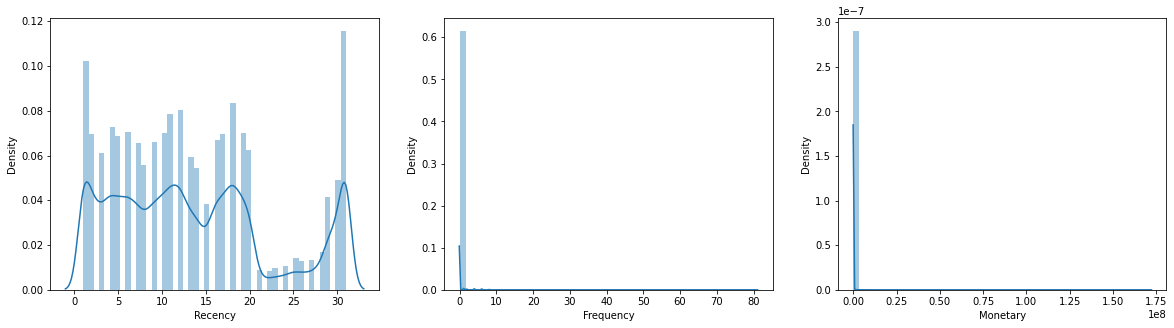

In [ ]:
#visual phan phoi  data from df_RFM
fig, ax = plt.subplots(1, 3, figsize=(20,5 ))
sns.distplot(RFM['Recency'], ax = ax[0])
sns.distplot(RFM['Frequency'], ax = ax[1])
sns.distplot(RFM['Monetary'], ax = ax[2])
plt.show()

**outlier of RFM**

Recency: 


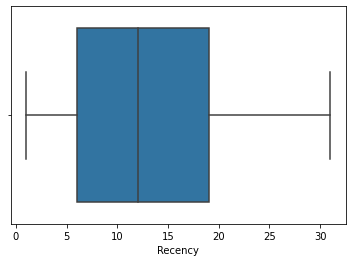

Frequency: 


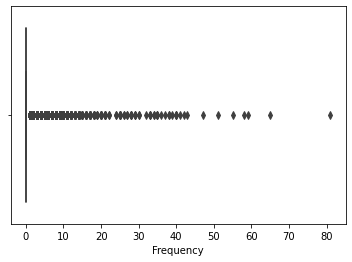

Monetary: 


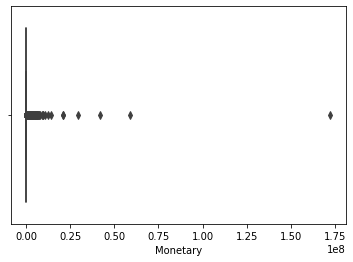

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
list1 = ['Recency','Frequency','Monetary']
for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x=RFM[str(i)])
    plt.show()

In [ ]:
from scipy import stats
import numpy as np
# remove the customer id column
new_df = RFM[['Recency','Frequency','Monetary']]
# remove outliers
z_scores = stats.zscore(new_df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = new_df[filtered_entries]

# **Using KMean analysis**

In [ ]:
new_df

In [ ]:
new_df.shape

(397582, 3)

# **Model Clustering (KMean_elbow)**

Text(0, 0.5, 'Inertia')

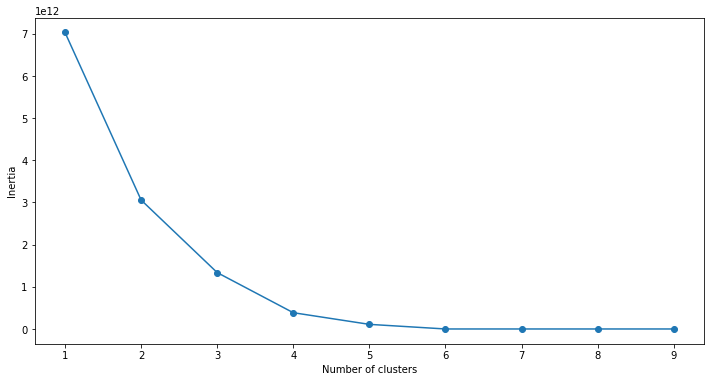

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(new_df)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# **drop**


In [ ]:
pred = kmeans.predict(scaled_features)
frame = pd.DataFrame(new_dfuser)
frame['cluster'] = pred
frame

NameError: ignored

In [ ]:
frame['account_id'] = RFM['account_id']
frame

,Recency,Frequency,Monetary,cluster,account_id
0,23,0,0,1,xxxxxxxxxxxxxxxx0e352a
2,3,0,0,0,xxxxxxxxxxxxxxxx0e3540
3,2,1,20000,3,xxxxxxxxxxxxxxxx0e3542
4,31,0,0,1,xxxxxxxxxxxxxxxx0e3543
6,28,0,0,1,xxxxxxxxxxxxxxxx0e355a
...,...,...,...,...,...
399123,12,1,49500,3,xxxxxxxxxxxxxxxxf357cd
399124,17,0,0,1,xxxxxxxxxxxxxxxxf357ce
399125,27,0,0,1,xxxxxxxxxxxxxxxxf357cf
399126,21,0,0,1,xxxxxxxxxxxxxxxxf357d0


In [ ]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397582 entries, 0 to 399127
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Recency     397582 non-null  int64 
 1   Frequency   397582 non-null  int64 
 2   Monetary    397582 non-null  int64 
 3   cluster     397582 non-null  int32 
 4   account_id  397582 non-null  object
dtypes: int32(1), int64(3), object(1)
memory usage: 16.7+ MB


In [ ]:
Cluster_sz = new_dfuser.groupby('cluster').size().to_frame()
Cluster_sz.columns = ["Cluster_size"]
Cluster_sz

,Cluster_size
cluster,
0,239764
1,155653
2,48
3,2117


In [ ]:
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
fg = ax.scatter3D(new_dfuser['Recency'], new_dfuser['Frequency'], new_dfuser['Monetary'], c = new_dfuser['cluster'])
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')


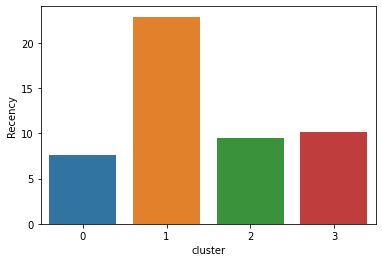

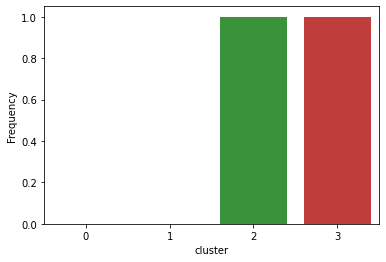

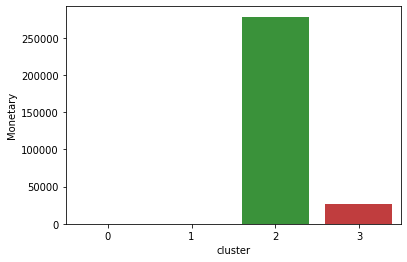

In [ ]:
avg_df = frame.groupby(['cluster'], as_index=False).mean()
for i in list1:
    sns.barplot(x='cluster',y=str(i),data=avg_df)
    plt.show()

# **Model Clustering**

In [ ]:
!pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: typer
    Found existing installation: typer 0.7.0
    Uninstalling typer-0.7.0:
      Successfully uninstalled typer-0.7.0


In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from fcmeans import FCM

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

n_clusters = 3
clusters = [
    KMeans(n_clusters=n_clusters),
    FCM(n_clusters=n_clusters),
    GaussianMixture(n_components=n_clusters),
   
]

scale = StandardScaler() 
X_scales = scale.fit_transform(RFM)

In [ ]:

np.random.seed(42)  # set seed

names = []
scores = []
n_samples = 10000
n_train = 10

for model in clusters:
    # Loop through each training
    name = model.__class__.__name__
    names.append(name)
    individual_score = []   # save score for each algorithm
    for _ in range(n_train):
        indices = np.random.choice(X_scales.shape[0], n_samples)
        X_train = X_scales[indices]
        model.fit(X_train)
        if name == 'OPTICS':
            labels = model.labels_
        else:
            labels = model.predict(X_train)
        score = silhouette_score(X_train, labels, n_jobs=-1)
        print(f'Algorithm Name: {name} - Score: {score}')
        individual_score.append(score)
    scores.append(individual_score)
    print('-' * 50)

Algorithm Name: KMeans - Score: 0.6011040154372363
Algorithm Name: KMeans - Score: 0.6041504153690451
Algorithm Name: KMeans - Score: 0.9253453709798387
Algorithm Name: KMeans - Score: 0.6014455089013147
Algorithm Name: KMeans - Score: 0.5989583220190631
Algorithm Name: KMeans - Score: 0.6012823592175998
Algorithm Name: KMeans - Score: 0.6057387668069777
Algorithm Name: KMeans - Score: 0.6008890784159058
Algorithm Name: KMeans - Score: 0.9312294049524075
Algorithm Name: KMeans - Score: 0.6040371928750671
--------------------------------------------------
Algorithm Name: FCM - Score: 0.5856146535694877
Algorithm Name: FCM - Score: 0.5903304689299645
Algorithm Name: FCM - Score: 0.5948652508033275
Algorithm Name: FCM - Score: 0.5779418429844116
Algorithm Name: FCM - Score: 0.5845445556090857
Algorithm Name: FCM - Score: 0.5856541881431077
Algorithm Name: FCM - Score: 0.5718112992553591
Algorithm Name: FCM - Score: 0.5822451477762352
Algorithm Name: FCM - Score: 0.5911899010962112
Algorit

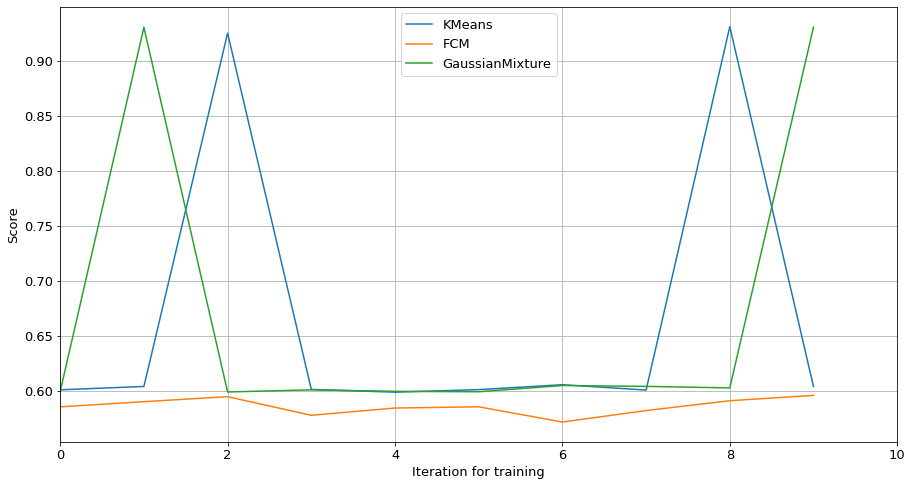

In [ ]:
# Plot 
plt.rcParams.update({'font.size': 13})
plt.figure(figsize=(15, 8))

for i, score in enumerate(scores):
    plt.plot(score, label=names[i])

plt.xlim([0, 10])
plt.xlabel('Iteration for training')
plt.ylabel('Score')
plt.grid()
plt.legend()

In [ ]:
from sklearn.preprocessing import normalize, StandardScaler
X_normalize = normalize(X_scales)

In [ ]:
X_normalized = pd.DataFrame(X_normalize)
X_normalized

In [ ]:
optics = OPTICS()
optics.fit(X_scales)

OPTICS()

In [ ]:
pred = optics.labels_
pred

array([ 0, 28, 31, ...,  4, 10,  5])

In [ ]:
pred = optics.labels_
frame = pd.DataFrame(new_df)
frame['cluster'] = pred
frame

,Recency,Frequency,Monetary,cluster
0,23,0,0,0
2,3,0,0,28
3,2,1,20000,31
4,31,0,0,8
6,28,0,0,5
...,...,...,...,...
399123,12,1,49500,-1
399124,17,0,0,14
399125,27,0,0,4
399126,21,0,0,10


In [ ]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397582 entries, 0 to 399127
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   Recency    397582 non-null  int64
 1   Frequency  397582 non-null  int64
 2   Monetary   397582 non-null  int64
 3   cluster    397582 non-null  int64
dtypes: int64(4)
memory usage: 15.2 MB


In [ ]:
frame.describe()

,Recency,Frequency,Monetary,cluster
count,397582.000000,397582.000000,397582.00000,397582.000000
mean,13.581181,0.005445,178.93793,18.267359
std,8.970609,0.073592,4205.42660,8.066746
min,1.000000,0.000000,0.00000,-1.000000
25%,6.000000,0.000000,0.00000,12.000000
50%,12.000000,0.000000,0.00000,19.000000
75%,19.000000,0.000000,0.00000,25.000000
max,31.000000,1.000000,495000.00000,84.000000


In [ ]:
Cluster_sz = new_df.groupby('cluster').size().to_frame()
Cluster_sz.columns = ["Cluster_size"]
Cluster_sz

,Cluster_size
cluster,
-1,44
0,2280
1,2481
2,3326
3,2999
...,...
80,8
81,54
82,10


In [ ]:
Cluster=frame.groupby('cluster').agg(
    {
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': 'mean'
     
    }
).reset_index()
Cluster

,cluster,Recency,Frequency,Monetary
0,-1,13.750000,1.0,127125.0
1,0,23.000000,0.0,0.0
2,1,24.000000,0.0,0.0
3,2,25.000000,0.0,0.0
4,3,26.000000,0.0,0.0
...,...,...,...,...
81,80,2.000000,1.0,99000.0
82,81,1.000000,1.0,99000.0
83,82,18.600000,1.0,198000.0
84,83,1.647059,1.0,198000.0


In [ ]:
#Plot for Optics Clustering

In [ ]:
frame.to_csv('OPTICS_cluster.csv', index=False)

# **Using KMean Analysis**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
np.random.seed(42)

# scale
scale = StandardScaler() 
X_scale = scale.fit_transform(new_df)

# build model
n_clusters = 3
model = KMeans(n_clusters=n_clusters)
model.fit(X_scale)

KMeans(n_clusters=3)

In [ ]:
labels = model.labels_
new_df['Clusters'] = labels

In [ ]:
#overview of RFM
new_df

,Recency,Frequency,Monetary,Clusters
0,23,0,0,0
2,3,0,0,1
3,2,1,20000,2
4,31,0,0,0
6,28,0,0,0
...,...,...,...,...
399123,12,1,49500,2
399124,17,0,0,0
399125,27,0,0,0
399126,21,0,0,0


In [ ]:
new_df['account_id'] = RFM['account_id']

new_df

,Recency,Frequency,Monetary,Clusters,account_id
0,23,0,0,0,xxxxxxxxxxxxxxxx0e352a
2,3,0,0,1,xxxxxxxxxxxxxxxx0e3540
3,2,1,20000,2,xxxxxxxxxxxxxxxx0e3542
4,31,0,0,0,xxxxxxxxxxxxxxxx0e3543
6,28,0,0,0,xxxxxxxxxxxxxxxx0e355a
...,...,...,...,...,...
399123,12,1,49500,2,xxxxxxxxxxxxxxxxf357cd
399124,17,0,0,0,xxxxxxxxxxxxxxxxf357ce
399125,27,0,0,0,xxxxxxxxxxxxxxxxf357cf
399126,21,0,0,0,xxxxxxxxxxxxxxxxf357d0


In [ ]:
new_df.to_csv('df_Cluster.csv', index=False)

In [ ]:
np.random.seed(42)

n_samples = 1500
indices = np.random.choice(new_df.shape[0], n_samples)
data = new_df.iloc[indices, :]
data

,Recency,Frequency,Monetary,label,Clusters
122697,3,0,0,1,1
147635,7,0,0,1,1
132682,8,0,0,1,1
366979,16,0,0,0,0
260052,2,0,0,1,1
...,...,...,...,...,...
379408,30,0,0,0,0
185191,8,0,0,1,1
267879,1,0,0,1,1
121639,11,0,0,1,1


In [ ]:
Cluster_sz = new_df.groupby('Clusters').size().to_frame()
Cluster_sz.columns = ["Cluster_size"]
Cluster_sz

,Cluster_size
Clusters,
0,155653
1,239764
2,2165


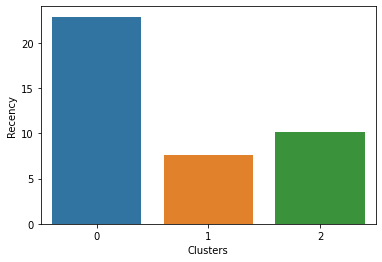

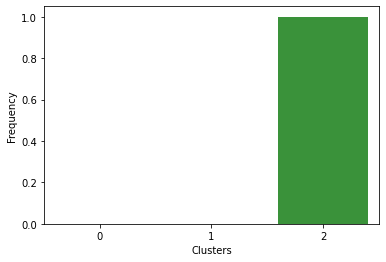

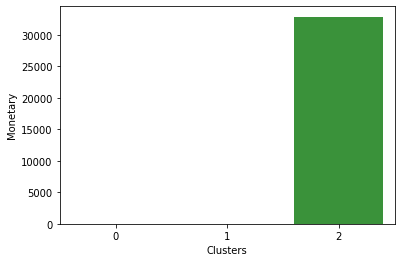

In [ ]:
avg_df = new_df.groupby(['Clusters'], as_index=False).mean()
for i in list1:
    sns.barplot(x='Clusters',y=str(i),data=avg_df)
    plt.show()